# Aufgabe 1: Mini-Suchmaschine (Text Preprocessing)

Erstelle ein Skript, das eine kleine Liste von Dokumenten vektorisiert und dann das Dokument findet, das einer Suchanfrage am ähnlichsten ist. Konzepte: TfidfVectorizer, fit_transform, transform, Cosine Similarity.

Deine Aufgabe:
Verwende TfidfVectorizer, um die Dokumente in Zahlen zu verwandeln.
Ignoriere dabei deutsche Stoppwörter (du kannst eine einfache Liste übergeben).
Wandle auch die Suchanfrage ("query") in einen Vektor um.
Berechne die Ähnlichkeit (Skalarprodukt).


In [1]:
# Kopiere diesen Code und fülle die # TODO-Lücken aus:

import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 1. Datenbasis: Ein paar Sätze über verschiedene Themen
documents = [
    "Der Hund bellt laut im Garten.",
    "Bilder verarbeiten ist spannend mit Python.",
    "Scikit-learn macht Textanalyse einfach.",
    "Katzen schlafen gerne den ganzen Tag auf dem Sofa.",
    "Neuronale Netze benötigen viele Bilder zum Training."
]

# 2. Eine Suchanfrage
query = ["Python Bilder Verarbeitung"]

# Initialisiere den TfidfVectorizer
stop=["der", "die", "das", "im", "mit", "ist", "zum", "den", "auf", "dem"] 
# oder nutze eine externe Liste, wenn du möchtest.
vectorizer = TfidfVectorizer(stop_words=stop)

# Lerne das Vokabular und transformiere die 'documents' (fit_transform)
tfidf_matrix = vectorizer.fit_transform(documents)

# Transformiere die 'query' (nur transform, NICHT fit!)
query_vec = vectorizer.transform(query)
print("Vokabular:", vectorizer.get_feature_names_out())
# print(f"Querz_vec: {query_vec}")

# Berechnung der Ähnlichkeit (Cosine Similarity)
# Da die Vektoren normalisiert sind, entspricht dies dem Dot-Product (Skalarprodukt)
similarities = cosine_similarity(query_vec, tfidf_matrix)

# Ergebnis ausgeben
best_doc_index = np.argmax(similarities)
print(f"Suchanfrage: {query[0]}")
print(f"Passendstes Dokument: {documents[best_doc_index]}")
print(f"Ähnlichkeitsscore: {similarities[0][best_doc_index]:.4f}")

Vokabular: ['bellt' 'benötigen' 'bilder' 'einfach' 'ganzen' 'garten' 'gerne' 'hund'
 'katzen' 'laut' 'learn' 'macht' 'netze' 'neuronale' 'python' 'schlafen'
 'scikit' 'sofa' 'spannend' 'tag' 'textanalyse' 'training' 'verarbeiten'
 'viele']
Suchanfrage: Python Bilder Verarbeitung
Passendstes Dokument: Bilder verarbeiten ist spannend mit Python.
Ähnlichkeitsscore: 0.6725


# Aufgabe 2: Der Bild-Zerstückeler (Image Preprocessing)

Ein Bild laden, es in kleine quadratische Stücke (Patches) zerlegen und die Dimensionen überprüfen. Dies ist der erste Schritt für viele Algorithmen (z.B. Dictionary Learning). Konzepte: load_sample_images, extract_patches_2d, Array-Shapes.

Deine Aufgabe:
Lade ein Beispielbild.
Extrahiere 100 zufällige Patches (Flicken) aus diesem Bild.
Überprüfe die Form (Shape) der Daten.



Originalbild-Größe: (427, 640, 3)
Shape der Patches: (50, 64, 64, 3)


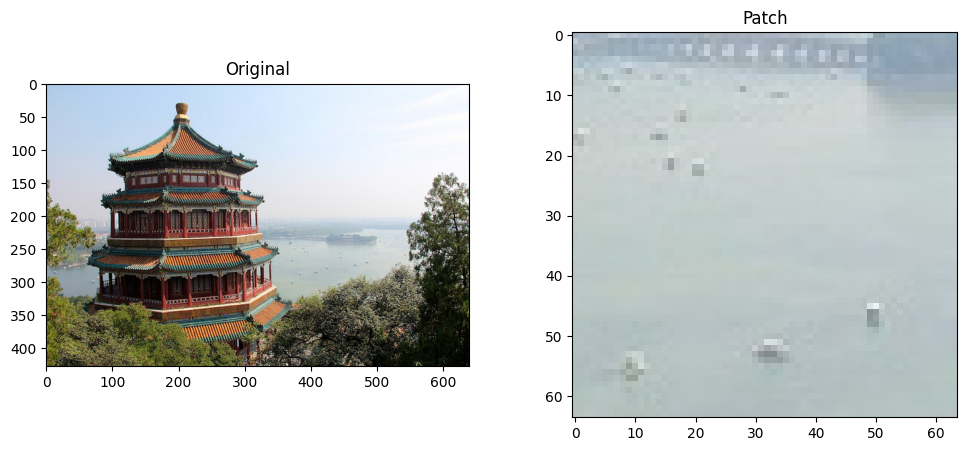

In [18]:
import numpy as np
from sklearn.datasets import load_sample_images
from sklearn.feature_extraction.image import extract_patches_2d
import matplotlib.pyplot as plt

# 1. Ein Beispielbild laden
dataset = load_sample_images()
image = dataset.images[0] # Wir nehmen das erste Bild (oft ein Tempel oder eine Blume)
# print(dataset.images)

print(f"Originalbild-Größe: {image.shape}")

# Definiere die Patch-Größe (z.B. 64x64 Pixel)
patch_size = (64, 64) # DEIN CODE HIER (z.B. 64, 64)

# Extrahiere 50 zufällige Patches aus dem Bild
# # Hinweis: Nutze extract_patches_2d.
# # Schau dir die Parameter 'max_patches' und 'random_state' an.
patches = extract_patches_2d(
    image,        # Input-Bild, numpy array (H, W[, C])
    patch_size,   # Größe des Patches: (höhe, breite)
    max_patches=50,  # Anzahl der Patches, None = alle möglich
    random_state=None  # für reproduzierbare zufällige Patches
)

# Überprüfung
if patches is not None:
    print(f"Shape der Patches: {patches.shape}")
    # Erwartetes Ergebnis bei 64x64 und Farbe: (50, 64, 64, 3)
else:
    print("Patches wurden noch nicht erstellt.")

# Zusatzaufgabe (Optional):
# Wenn du matplotlib installiert hast, versuche den ersten Patch anzuzeigen:
# import matplotlib.pyplot as plt

fig, ax  = plt.subplots(1,2, figsize=(12,5))    #subplots

ax[0].imshow(image)
ax[0].set_title("Original")

ax[1].imshow(patches[20])
ax[1].set_title("Patch")

plt.show()